 In this tutorial we will numerically evaluate inverse Laplace transforms
 sing 'invertlaplace()' in the mpmath module.

 nverse Laplace transforms are very useful  in electronics and are often
 sed to calculate the transient response of circuits.  Typically, one
 alculates the response of the circuit in the "s = jw" or complex-frequency
 omain using methods that a familiar from steady-state circuit analysis.
 hen one takes the inverse Laplace transform to that result to deduce
 he circuit's transient response.  In this tutorial, we demonstrate the
 ethode using two examples for which both the transient and s-domain 
 esponses are already known.

In [2]:
# First import the modules that will be required.
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# This line sets the number of decimal points (dps) to be used in calculations.
# We will required mp.dps to be high in order to calculate precise transient 
# responses.
mp.dps = 350

The main function that we will use is 'mp.invertlaplace()'.  To execute,
it requires the s-domain function fs that is to be transformed into the
time domain and a single time.  In order to extract the full transient
response, we define a function that passes times from a list one by one.
The degree option determines the number of terms to be used in the approximations.
The higher, the better the result and the longer the calculation takes.
The 'if' statement is just used to print the progress of the calculation.
By default, pnt = True and the progress will be printed in increments of
10%.

In [ ]:
def trans_response(tt, fs, deg, pnt = True):
    trans = []
    cnt = 0
    for t in tt:    
        if len(trans) % int(pts/10) == 0 and pnt == True:
            print(cnt*10,'%', sep = '')
            cnt += 1
        trans += [mp.invertlaplace(fs, t, method = 'dehoog', degree = deg)]
    return trans

In [5]:
# In the first example, the we will take the inverse Laplace transform of
# e^(-c*s)/s which should result in a step at t = c.
Vg = 2
c = 0.5e-6
fs = lambda s: Vg*mp.exp(-c*s)/s

We use a 'with' statement to temporarily reduce the dps for the first 
example within the indented block of code.

2021-03-11 10:31:16.021710
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
2021-03-11 10:31:18.694646


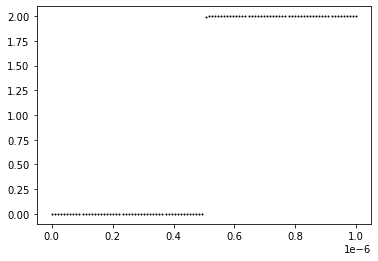

In [6]:
with mp.workdps(20):
    # Here, we call the fucntion that we defined above and then plot the result.
    from datetime import datetime
    print(datetime.now())
    pts = 100
    tt = np.linspace(1e-10, 1e-6, pts)
    plt.plot(tt, trans_response(tt, fs, 20), 'k.', markersize = 2)
    print(datetime.now())

This next example is the transient response of a coaxial cable to a 
voltage step.  The centre conductors of the coax at one end is connected
to a resistor of resistance Rg and the voltage step of size Vg is applied to
the opposite end of the Rg.  The free end of the coaxial cable is left open.
The coaxial cable has a characteristic impedance of Z0 = 50 ohms and a 
length of 8 meters.


In [ ]:

Vg = 1 # volt
ell = 8 # meters
v0 = 3e8/np.sqrt(2.1) # m/s
Rg = 1e3 # ohms
Z0 = 50 # ohms

In [8]:
# This is the s-domain response of the coax. 
fs = lambda s: (Vg/s)*mp.coth(s*ell/v0)/(Rg/Z0 + mp.coth(s*ell/v0))

 Here, we call our function with high 'dps' and 'degree' values and then
 plot the calculated transient response.  We expect to get a 'staircase'
 response with the size of the steps decreasing as time evolves.  This block
 of code took about 12 minutes to execute on my laptop.


2021-03-11 10:33:31.172249
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
2021-03-11 10:45:05.458700


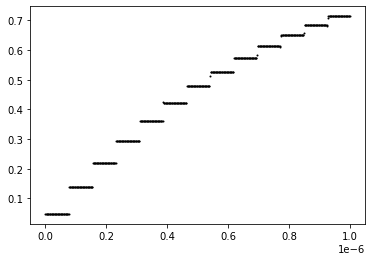

In [9]:

plt.figure()
from datetime import datetime
print(datetime.now())
pts = 500
tt = np.linspace(1e-10, 1e-6, pts)
plt.plot(tt, trans_response(tt, fs, 150), 'k.', markersize = 2)
print(datetime.now())